<a href="https://colab.research.google.com/github/Megacity1/CartpoleDQN/blob/main/Week%203%20Deep%20RL%202/CartPoleDQN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Q Network (DQN) for CartPole Using Boltzmann Q Policy
This exercise implements a DQN for CartPole using a Boltzmann Q policy for selecting the actions

In [57]:
# install keras rl2 (we need to install keras-rl2 so it works with the tensorflow 2 version that comes pre-installed with colab)
!pip install keras-rl2

In [58]:
!pip install gym

In [62]:
# load the gym module
import gym
import matplotlib.pyplot as plt
# import the usual Keras modules for creating deep neural networks
from keras import Sequential
from keras.layers import Input, Flatten, Dense
!pip install Adam
#from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam
ENV_NAME = 'CartPole-v0'
env = gym.make(ENV_NAME)

Implementation of DQN for CartPole, applying policy BoltzmannQPolicy

##Implement DQN with BoltzmannGumbelQPolicy

Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_42 (Flatten)        (None, 4)                 0         
                                                                 
 dense_85 (Dense)            (None, 16)                80        
                                                                 
 dense_86 (Dense)            (None, 2)                 34        
                                                                 
Total params: 114
Trainable params: 114
Non-trainable params: 0
_________________________________________________________________
None


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Training for 8000 steps ...


/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
/usr/local/lib/python3.7/dist-packages/rl/memory.py:37: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')


   31/8000: episode: 1, duration: 12.823s, episode steps:  31, steps per second:   2, episode reward: 31.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.581 [0.000, 1.000],  loss: 0.523987, mae: 0.558366, mean_q: 0.126187, mean_eps: 0.800000


/usr/local/lib/python3.7/dist-packages/rl/memory.py:37: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')


   50/8000: episode: 2, duration: 0.437s, episode steps:  19, steps per second:  43, episode reward: 19.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.474 [0.000, 1.000],  loss: 0.459496, mae: 0.556377, mean_q: 0.250469, mean_eps: 0.800000
   76/8000: episode: 3, duration: 0.504s, episode steps:  26, steps per second:  52, episode reward: 26.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.500 [0.000, 1.000],  loss: 0.395295, mae: 0.582930, mean_q: 0.393101, mean_eps: 0.800000
   93/8000: episode: 4, duration: 0.280s, episode steps:  17, steps per second:  61, episode reward: 17.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.529 [0.000, 1.000],  loss: 0.328316, mae: 0.595084, mean_q: 0.522511, mean_eps: 0.800000
  116/8000: episode: 5, duration: 0.335s, episode steps:  23, steps per second:  69, episode reward: 23.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.609 [0.000, 1.000],  loss: 0.300602, mae: 0.646137, mean_q: 0.669113, mean_eps: 0.800

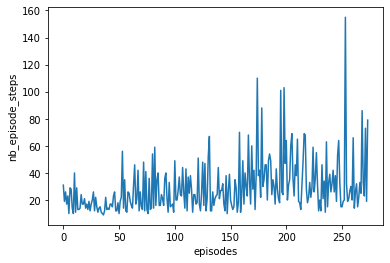

Testing for 20 episodes ...
Episode 1: reward: 200.000, steps: 200
Episode 2: reward: 200.000, steps: 200
Episode 3: reward: 105.000, steps: 105
Episode 4: reward: 192.000, steps: 192
Episode 5: reward: 184.000, steps: 184
Episode 6: reward: 84.000, steps: 84
Episode 7: reward: 145.000, steps: 145
Episode 8: reward: 104.000, steps: 104
Episode 9: reward: 200.000, steps: 200
Episode 10: reward: 134.000, steps: 134
Episode 11: reward: 174.000, steps: 174
Episode 12: reward: 102.000, steps: 102
Episode 13: reward: 88.000, steps: 88
Episode 14: reward: 92.000, steps: 92
Episode 15: reward: 133.000, steps: 133
Episode 16: reward: 200.000, steps: 200
Episode 17: reward: 200.000, steps: 200
Episode 18: reward: 200.000, steps: 200
Episode 19: reward: 110.000, steps: 110
Episode 20: reward: 200.000, steps: 200


In [93]:
import rl
from rl.memory import SequentialMemory  # import the exerience replay buffer module
from rl.policy import BoltzmannGumbelQPolicy
from rl.policy import LinearAnnealedPolicy
from rl.policy import EpsGreedyQPolicy
from rl.agents.dqn import DQNAgent      # import the DQN agent

# setup experience replay buffer
memory = SequentialMemory(limit=10000, window_length=1)

policy = LinearAnnealedPolicy(EpsGreedyQPolicy(), 
                               attr='eps',            
                               value_max=8.,
                               value_min=.8, 
                               value_test=.05,
                               nb_steps=20)
# Q-Network
model = Sequential()
model.add(Input(shape=(1,env.observation_space.shape[0])))  # The input is 1 observation vector, and the number of observations in that vector 
model.add(Flatten())
model.add(Dense(16, activation='relu'))
# add extra layers here
model.add(Dense(env.action_space.n, activation='linear'))   # the output is the number of actions in the action space

print(model.summary())

# define the agent
dqn = DQNAgent(model=model, 
               nb_actions=env.action_space.n,
               memory=memory,
               nb_steps_warmup=20,
               target_model_update=1e-2, 
               policy=policy) 

dqn.compile(Adam(lr=1e-3), metrics=['mae'])

history = dqn.fit(env, nb_steps=8000, visualize=False, verbose=2)

# summarize the history for number  of episode steps
plt.plot(history.history['nb_episode_steps'])
plt.ylabel('nb_episode_steps')
plt.xlabel('episodes')
plt.show()

dqn.test(env, nb_episodes=20, visualize=False)